In [1]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

In [2]:
#파일 불러오기
users=pd.read_csv('//home/piai/바탕화면/cvs_users.csv',encoding='cp949')
weather=pd.read_csv('//home/piai/바탕화면/cvs_weather.csv',encoding='cp949')
sales=pd.read_csv('//home/piai/바탕화면/cvs_sales.csv',encoding='cp949')
items=pd.read_csv('//home/piai/바탕화면/cvs_items.csv',encoding='cp949')
sales

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L
...,...,...,...,...,...,...,...,...,...,...,...
510218,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8804989201326,현대)갈릭페스츄리오징어
510219,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8809617945115,길림)와사비맛아몬드40g
510220,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8809811824100,신)고구마치아바타피자
510221,U100831,U100831-POS2021-10302,2021-09-12T09:13:30,2021-09-12,2021,2021-09,9,일요일,9,I-8801007075259,CJ)오곡참깨드레싱105g


In [4]:
a=sales.merge(items, how='left')
a

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,Item_CatORMaker,Price,ImageUrl
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,L5,식품,M1,가공식사,CJ,10000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,L6,음료,M1,음료,롯,2200,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,L5,식품,M3,식재료,PSK,6800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,L5,식품,M3,식재료,오뚜기,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,L6,음료,M2,아이스링크,22del,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510218,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8804989201326,현대)갈릭페스츄리오징어,L5,식품,M2,안주류,현대,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
510219,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8809617945115,길림)와사비맛아몬드40g,L5,식품,M2,안주류,길림,2000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
510220,U100831,U100831-POS2021-10299,2021-09-10T15:33:00,2021-09-10,2021,2021-09,9,금요일,15,I-8809811824100,신)고구마치아바타피자,L5,식품,M1,가공식사,신,3400,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...
510221,U100831,U100831-POS2021-10302,2021-09-12T09:13:30,2021-09-12,2021,2021-09,9,일요일,9,I-8801007075259,CJ)오곡참깨드레싱105g,L5,식품,M3,식재료,CJ,1600,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...


In [7]:
users_drop=users.drop('UserYear',axis=1,inplace=False)
users_drop= users_drop.drop_duplicates()
users_drop

,idUser,Gender,AgeGroup
0,U100001,남성,40대
2,U100002,여성,30대
4,U100003,남성,30대
6,U100004,남성,30대
8,U100005,여성,30대
...,...,...,...
2112,U101094,남성,10대
2114,U101095,남성,40대
2116,U101096,여성,30대
2118,U101097,남성,30대


In [11]:
b=a.merge(users_drop)
b.head()

,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,ItemId,ItemName,ItemIdLarge,ItemNameLarge,ItemIdMiddle,ItemNameMiddle,Item_CatORMaker,Price,ImageUrl,Gender,AgeGroup
0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801007795751,CJ)고메모짜돈카츠450g,L5,식품,M1,가공식사,CJ,10000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,남성,40대
1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8801056170059,롯)칠성사이다복숭아P500,L6,음료,M1,음료,롯,2200,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,남성,40대
2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,I-8809640112157,PSK)스윗사파이어포도400g,L5,식품,M3,식재료,PSK,6800,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,남성,40대
3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8801045611211,오뚜기)물엿700g,L5,식품,M3,식재료,오뚜기,3000,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,남성,40대
4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,I-8809253648470,22del)헤이즐넛향1L,L6,음료,M2,아이스링크,22del,3500,https://tqklhszfkvzk6518638.cdn.ntruss.com/pro...,남성,40대


<AxesSubplot:xlabel='SalesYear,AgeGroup'>

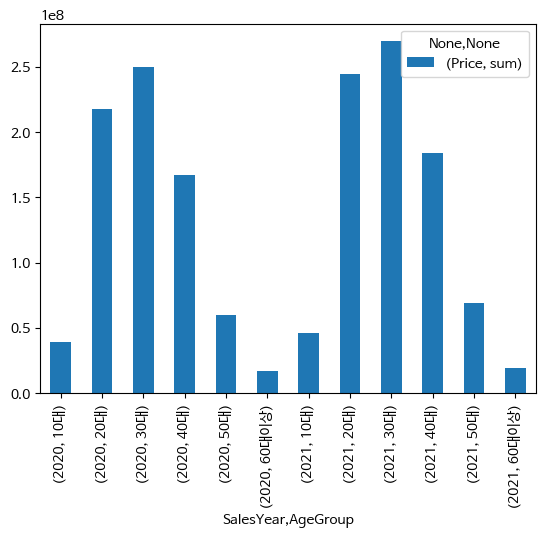

In [19]:
c=b.groupby(['SalesYear','AgeGroup']).agg({'Price':['sum']})
c.plot(kind='bar')

In [22]:
c

Price
                         mean
SalesYear Gender             
2020      남성      3093.502805
          여성      3081.730606
2021      남성      3125.215407
          여성      3107.661481

<AxesSubplot:xlabel='SalesYear,AgeGroup'>

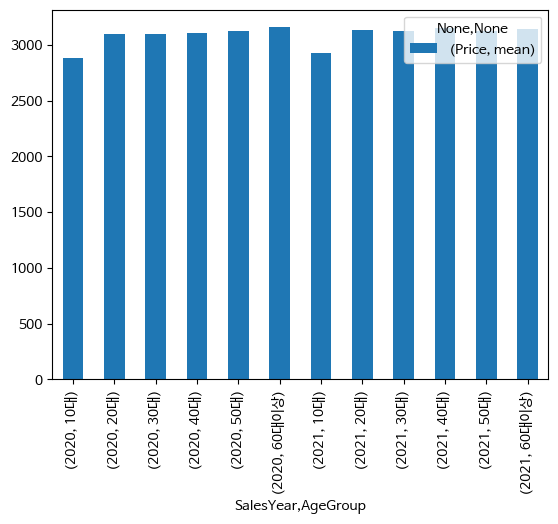

In [20]:
c=b.groupby(['SalesYear','AgeGroup']).agg({'Price':['mean']})
c.plot(kind='bar')

<AxesSubplot:xlabel='SalesYear,Gender'>

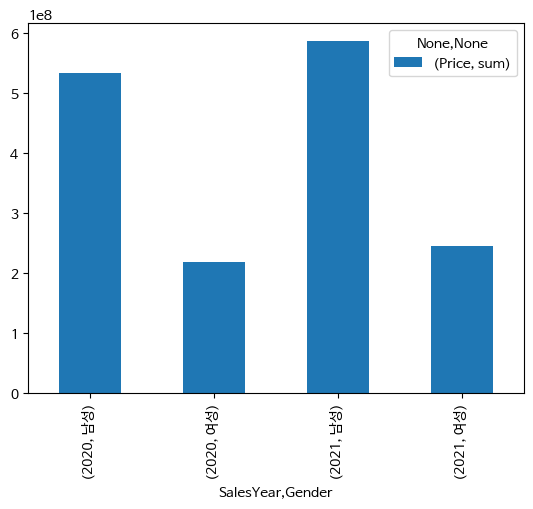

In [18]:
c=b.groupby(['SalesYear','Gender']).agg({'Price':['sum']})
c.plot(kind='bar')

<AxesSubplot:xlabel='SalesYear,Gender'>

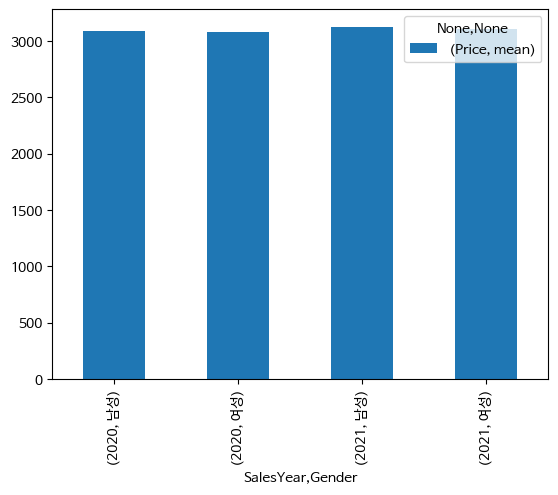

In [21]:
c=b.groupby(['SalesYear','Gender']).agg({'Price':['mean']})
c.plot(kind='bar')